In [1]:
# import packages
import csv
import pandas as pd
import numpy as np
import os
import nltk
import re
from nltk import word_tokenize

In [2]:
df_B = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/2014-B-EMPFreeResponse.csv")
df_B.head()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,What are the student's strengths?
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,"Communication skills, leadership, lead by example"


In [3]:
# Copy the 'Strengths' Columm
df_B.rename(columns = {"What are the student's strengths?":'Strengths'}, inplace = True)
df_B

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,"Communication skills, leadership, lead by example"
...,...,...,...,...,...,...,...,...,...,...
728,5918,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,He became our go to person and team lead for p...
729,5920,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,[Student] was THE FIRST to let all know if she...
730,5921,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"[Student] has great organizational skills, she..."
731,5932,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,[Student] is great with teamwork. He has a wil...


In [4]:
# import another file
df_BE = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/2014-BE-EMPFreeResponse.csv")

In [5]:
df_BE.head()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,What are the student's strengths?
0,17,201435-201445,SR,BE,ECON,4COP,NaN,Only,US Citizen,Student was very efficient and excellent as it...
1,174,201435-201445,SR,BE,ECON,5COP,NaN,Second,Resident Alien Non-Citizen,[Student] is a really hard worker. [Student's...
2,363,201435-201445,JR,BE,ECON,5COP,MAEC,Second,Resident Alien Non-Citizen,[Student's] greatest strengths are her desire ...
3,384,201435-201445,SR,BE,ECON,5COP,NaN,Second,US Citizen,"[Student] possesses a terrific attitude, work ..."
4,548,201435-201445,JR,BE,ECON,5COP,MAEC,First,US Citizen,"Team player, Initiative, Leadership, Communica..."


In [6]:
# Rename the 'Strengths' Columm
df_BE.rename(columns = {"What are the student's strengths?":'Strengths'}, inplace = True)

In [7]:
# Merged two files
df_contact = pd.concat([df_B, df_BE], axis = 0)
# df_merge = df_B + df_BE

In [8]:
# Check if contact successfully
df_contact

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,"Communication skills, leadership, lead by example"
...,...,...,...,...,...,...,...,...,...,...
39,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,[Student] has been an incredible help and cont...
40,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,"[Student] is self-motivated, a quick learner t..."
41,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Independent. Quickly learns and understands co...
42,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Ability to accomplish complex tasks with minim...


In [9]:
# Reset the index
df_contact.reset_index(inplace = True, drop = True)
df_contact

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,[Student's] strengths include the ability to m...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"[Student] is detail-oriented, customer-focused..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention to detail and work ethic. ...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,"Communication skills, leadership, lead by example"
...,...,...,...,...,...,...,...,...,...,...
772,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,[Student] has been an incredible help and cont...
773,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,"[Student] is self-motivated, a quick learner t..."
774,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Independent. Quickly learns and understands co...
775,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Ability to accomplish complex tasks with minim...


In [10]:
# Check the duplicated
df_contact.duplicated().sum()

0

In [11]:
df_contact.isnull().sum()

Respondent ID           0
Terms                   0
Class (BOT)             0
College Code            0
Major Code              0
Conc                    0
Major Conc            754
Co-op #                 0
Citizenship Status      0
Strengths               5
dtype: int64

In [12]:
from nltk.corpus import stopwords
import string
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

In [13]:
# Convert Column Value to string
df_contact[['Strengths']] = df_contact[['Strengths']].astype(str)


In [14]:
# Remove Punctuations
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [15]:
# dataframe
df_contact['Strengths'] = df_contact['Strengths'].apply(lambda x: remove_punctuations(x))
df_contact

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,Students strengths include the ability to mana...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge in compiling and analyz...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Student is detailoriented customerfocused and ...
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention to detail and work ethic Q...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,Communication skills leadership lead by example
...,...,...,...,...,...,...,...,...,...,...
772,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Student has been an incredible help and contri...
773,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,Student is selfmotivated a quick learner that ...
774,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Independent Quickly learns and understands com...
775,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Ability to accomplish complex tasks with minim...


In [16]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Remove stopwords
from nltk.corpus import stopwords

In [18]:
STOPWORDS = set(stopwords.words('english'))

In [19]:
# It has been modifies this time
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [20]:
df_contact['Strengths'] = df_contact['Strengths'].apply(lambda x: remove_stopwords(x))
df_contact

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,Students strengths include ability manage time...
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,Demonstrates knowledge compiling analyzing com...
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,Student detailoriented customerfocused works w...
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,Excellent attention detail work ethic Quick le...
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,Communication skills leadership lead example
...,...,...,...,...,...,...,...,...,...,...
772,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Student incredible help contributor team past ...
773,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,Student selfmotivated quick learner needs mini...
774,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Independent Quickly learns understands company...
775,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,Ability accomplish complex tasks minimal defin...


In [21]:
# d1['Strengths'] = d1['Strengths'].astype('str')
df_contact['Strengths'] = df_contact['Strengths'].str.lower()
## Experiment Record: 
# org_project.columns=org_project.columns.map(lambda x:x.lower())
# new_df_copy = df.loc[df.col1>2].copy()
# new_df_copy.loc[2, 'new_column'] = 100
# Codes with # cannot work well however only worked code result in SettingWithCopyWarning:

In [22]:
# Lemmatization Package Download
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\37605\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# Implementing Lemmatization: Input and Assignment
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
# Reference: https://www.jianshu.com/p/a4c878412c49
print(type(df_contact['Strengths']))

<class 'pandas.core.series.Series'>


In [24]:
# try to tokenize in input raw
def word_tokens(text):
      Token = word_tokenize(text)
      return Token

In [25]:
# Try to tokenize the ['Strengths'] again
df_contact['Strengths_tokens'] = df_contact['Strengths'].apply(lambda x: word_tokens(x))

In [26]:
# Try to lemmatize again
wnl = nltk.WordNetLemmatizer()

In [27]:
def Wnlemm(s):
    words = [wnl.lemmatize(r) for r in s]
    return words

In [28]:
df_contact['Strengths_lem'] = df_contact['Strengths_tokens'].apply(lambda x: Wnlemm(x))

In [29]:
df_contact.head()
# Bingo!
# Reference: Yamini's code

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths,Strengths_tokens,Strengths_lem
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,students strengths include ability manage time...,"[students, strengths, include, ability, manage...","[student, strength, include, ability, manage, ..."
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,demonstrates knowledge compiling analyzing com...,"[demonstrates, knowledge, compiling, analyzing...","[demonstrates, knowledge, compiling, analyzing..."
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,student detailoriented customerfocused works w...,"[student, detailoriented, customerfocused, wor...","[student, detailoriented, customerfocused, wor..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,excellent attention detail work ethic quick le...,"[excellent, attention, detail, work, ethic, qu...","[excellent, attention, detail, work, ethic, qu..."
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,communication skills leadership lead example,"[communication, skills, leadership, lead, exam...","[communication, skill, leadership, lead, example]"


In [30]:
# Setting some words that not useful to analyze
Uword = ['student', 'able', 'never', 'work', 'task', 'project', 'include', 'strength', 'very', 'good', 'always', 'great', 'well', 'excellent', 'other', 'also', 'coop', 'working', 'i', 'he', 'she', 'his', 'her', 'him', 'me', "'", 's']

In [31]:
# Remove these unuseful words
# def remove_Uword(text):
#     return ", ".join([word for word in text if word not in Uword])
def remove_Uword(text):
     return ", ".join([word for word in text if word not in Uword])

In [32]:
df_contact['Strengths_U'] = df_contact['Strengths_lem'].apply(lambda x: remove_Uword(x))

In [33]:
# Check if remove unuseful words succesfully
df_contact.head()
print(type(df_contact['Strengths_U']))
# But it seems to ['Strengths_U'] never be tokenized...

<class 'pandas.core.series.Series'>


In [34]:
# Try to make a copy of df_contact, I will have an experiment of further analysis later
import copy

In [35]:
df_preproce = copy.deepcopy(df_contact)
df_preproce

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths,Strengths_tokens,Strengths_lem,Strengths_U
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,students strengths include ability manage time...,"[students, strengths, include, ability, manage...","[student, strength, include, ability, manage, ...","ability, manage, time, complete, daily, assign..."
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,demonstrates knowledge compiling analyzing com...,"[demonstrates, knowledge, compiling, analyzing...","[demonstrates, knowledge, compiling, analyzing...","demonstrates, knowledge, compiling, analyzing,..."
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,student detailoriented customerfocused works w...,"[student, detailoriented, customerfocused, wor...","[student, detailoriented, customerfocused, wor...","detailoriented, customerfocused, team, environ..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,excellent attention detail work ethic quick le...,"[excellent, attention, detail, work, ethic, qu...","[excellent, attention, detail, work, ethic, qu...","attention, detail, ethic, quick, learner, show..."
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,communication skills leadership lead example,"[communication, skills, leadership, lead, exam...","[communication, skill, leadership, lead, example]","communication, skill, leadership, lead, example"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,student incredible help contributor team past ...,"[student, incredible, help, contributor, team,...","[student, incredible, help, contributor, team,...","incredible, help, contributor, team, past, 6, ..."
773,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,student selfmotivated quick learner needs mini...,"[student, selfmotivated, quick, learner, needs...","[student, selfmotivated, quick, learner, need,...","selfmotivated, quick, learner, need, minimal, ..."
774,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,independent quickly learns understands company...,"[independent, quickly, learns, understands, co...","[independent, quickly, learns, understands, co...","independent, quickly, learns, understands, com..."
775,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,ability accomplish complex tasks minimal defin...,"[ability, accomplish, complex, tasks, minimal,...","[ability, accomplish, complex, task, minimal, ...","ability, accomplish, complex, minimal, definit..."


In [36]:
df_preproce = df_preproce.drop(['Strengths', 'Strengths_tokens', 'Strengths_lem'], axis = 1)

In [37]:
## Until Nov25 0:56am, I had finished almost all necessary steps in preprocessing, I will compare the difference between ['Strengths_U'] and ['Strengths_U'] tomorrow.

In [38]:
df_contact.head()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths,Strengths_tokens,Strengths_lem,Strengths_U
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,students strengths include ability manage time...,"[students, strengths, include, ability, manage...","[student, strength, include, ability, manage, ...","ability, manage, time, complete, daily, assign..."
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,demonstrates knowledge compiling analyzing com...,"[demonstrates, knowledge, compiling, analyzing...","[demonstrates, knowledge, compiling, analyzing...","demonstrates, knowledge, compiling, analyzing,..."
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,student detailoriented customerfocused works w...,"[student, detailoriented, customerfocused, wor...","[student, detailoriented, customerfocused, wor...","detailoriented, customerfocused, team, environ..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,excellent attention detail work ethic quick le...,"[excellent, attention, detail, work, ethic, qu...","[excellent, attention, detail, work, ethic, qu...","attention, detail, ethic, quick, learner, show..."
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,communication skills leadership lead example,"[communication, skills, leadership, lead, exam...","[communication, skill, leadership, lead, example]","communication, skill, leadership, lead, example"


In [39]:
df_preproce.head()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths_U
0,6,201435-201445,SR,B,ACCT,4COP,NaN,Only,US Citizen,"ability, manage, time, complete, daily, assign..."
1,11,201415-201425,JR,B,FIN,4COP,NaN,Only,US Citizen,"demonstrates, knowledge, compiling, analyzing,..."
2,25,201435-201445,JR,B,GBUS,4COP,NaN,Only,US Citizen,"detailoriented, customerfocused, team, environ..."
3,37,201435-201445,SR,B,LGST,5COP,NaN,Second,US Citizen,"attention, detail, ethic, quick, learner, show..."
4,44,201435-201445,SO,B,BAE,5COP,NaN,First,US Citizen,"communication, skill, leadership, lead, example"


In [40]:
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string
# df_preproce['Strengths_U2'] = df_preproce['Strengths_U'].replace('','')
# df_preproce['Strengths_U2'] = re.sub(r"^\s+", "", df_preproce['Strengths_U'], flags=re.UNICODE)

In [41]:
df_preproce.tail()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Major Conc,Co-op #,Citizenship Status,Strengths_U
772,5033,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,"incredible, help, contributor, team, past, 6, ..."
773,5057,201435-201445,SR,BE,ECON,5COP,BSEC,Third,US Citizen,"selfmotivated, quick, learner, need, minimal, ..."
774,5410,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,"independent, quickly, learns, understands, com..."
775,5736,201435-201445,SR,BE,ECON,5COP,NaN,Third,US Citizen,"ability, accomplish, complex, minimal, definit..."
776,5944,201435-201445,PJ,BE,ECON,5COP,NaN,Second,US Citizen,"detailed, focused, willingness, learn, listens"


In [42]:
from collections import Counter
# freq_Strengths_U = Counter(df_preproce['Strengths_U'])
# freq_Strengths_U
# bow1 = Counter(df_14Strength)
# bow1
# dfV_14Strength = pd.DataFrame(bow1.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
# print(dfV_14Strength)
# # Reference: Yamini's code

In [43]:
len(df_preproce['Strengths_U'].sum())

113232

In [44]:
df_14Strength = copy.deepcopy(df_preproce['Strengths_U'])
df_14Strength

0      ability, manage, time, complete, daily, assign...
1      demonstrates, knowledge, compiling, analyzing,...
2      detailoriented, customerfocused, team, environ...
3      attention, detail, ethic, quick, learner, show...
4        communication, skill, leadership, lead, example
                             ...                        
772    incredible, help, contributor, team, past, 6, ...
773    selfmotivated, quick, learner, need, minimal, ...
774    independent, quickly, learns, understands, com...
775    ability, accomplish, complex, minimal, definit...
776       detailed, focused, willingness, learn, listens
Name: Strengths_U, Length: 777, dtype: object

In [45]:
type(df_14Strength)

pandas.core.series.Series

In [46]:
df_preproce['Strengths_U_2'] = df_preproce['Strengths_U'].apply(len)

In [47]:
len(df_preproce.Strengths_U.sum())

113232

In [48]:
# Try to merge each unit of list
ag_strength = "".join(df_preproce['Strengths_U'])
# Reference: Yamini's code

In [49]:
words_strength = word_tokenize(ag_strength)

In [50]:
len(words_strength)

24187

In [51]:
bow1 = Counter(words_strength)

In [52]:
# Try to remove ',' in python list
words_strength
for i in words_strength[:]:
    if i == ",":
        words_strength.remove(i)
# Reference: https://blog.csdn.net/weixin_44123630/article/details/110496150

In [53]:
bow_14Strength = Counter(words_strength)

In [54]:
df_14S_f = pd.DataFrame(bow_14Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_14S_f
# Reference: Yamini's code

,word,frequency
29,team,180
11,skill,152
2,time,117
43,new,105
42,learn,104
...,...,...
1831,detailsuccess,1
1830,skillattendance,1
603,streamlining,1
1828,aroundhard,1


Text(0, 0.5, 'Word(Bigram)')

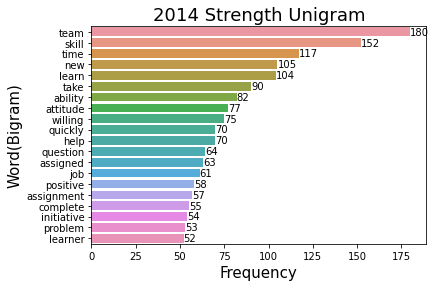

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
Vsns_14S_f = sns.barplot(x = 'frequency', y = 'word', data = df_14S_f.head(20))
for i in Vsns_14S_f.containers:
    Vsns_14S_f.bar_label(i,)
Vsns_14S_f.set_title('2014 Strength Unigram', size = 18)
Vsns_14S_f.set_xlabel("Frequency", size = 15)
Vsns_14S_f.set_ylabel("Word(Bigram)", size = 15)
# Reference:
# [1] https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
# [2] https://www.geeksforgeeks.org/change-axis-labels-set-title-and-figure-size-to-plots-with-seaborn/

In [56]:
## Until Nov 26th 23:56, I had finished word frequency in unigram, I need add bigram and trigram later.

In [57]:
type(words_strength)

list

In [58]:
Strength_Uni = copy.deepcopy(words_strength)
type(Strength_Uni)

list

In [59]:
S_Unilist = ' '.join([str(item) for item in words_strength])

In [60]:
print(S_Unilist)

ability manage time complete daily assignment detail oriented extremely organized communication skill reliable individualdemonstrates knowledge compiling analyzing comparative report data skill creating chart graph superior knowledge using microsoft office applicationdetailoriented customerfocused team environmentattention detail ethic quick learner showed strong interest going way improve process willingness learn new thingcommunication skill leadership lead examplemajor passion completelythe ability identify issue bring issue attention ability easily male proceduredone job networking building professional relationship outside immediate team creative idea improving process receptive feedback asks question learn used within larger organization showing insight beyond scope current roledone lot audit involved the senior auditor transferred allowed john jump help involved within team want involved much possible attends intern event team eventdependable thoughtfuldemonstrated adaptability 

In [61]:
# Bigram and Trigram
from nltk import ngrams, bigrams, trigrams
from nltk.util import ngrams

def get_grams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]
# Reference: https://stackoverflow.com/questions/17531684/n-grams-in-python-four-five-six-grams

In [62]:
S_Bilist = get_grams(S_Unilist, 2)
print(S_Bilist)

['ability manage', 'manage time', 'time complete', 'complete daily', 'daily assignment', 'assignment detail', 'detail oriented', 'oriented extremely', 'extremely organized', 'organized communication', 'communication skill', 'skill reliable', 'reliable individualdemonstrates', 'individualdemonstrates knowledge', 'knowledge compiling', 'compiling analyzing', 'analyzing comparative', 'comparative report', 'report data', 'data skill', 'skill creating', 'creating chart', 'chart graph', 'graph superior', 'superior knowledge', 'knowledge using', 'using microsoft', 'microsoft office', 'office applicationdetailoriented', 'applicationdetailoriented customerfocused', 'customerfocused team', 'team environmentattention', 'environmentattention detail', 'detail ethic', 'ethic quick', 'quick learner', 'learner showed', 'showed strong', 'strong interest', 'interest going', 'going way', 'way improve', 'improve process', 'process willingness', 'willingness learn', 'learn new', 'new thingcommunication', '

In [63]:
# Count Bigram
bow_14Strength_Bi = Counter(S_Bilist)

In [64]:
df_14SBi_f = pd.DataFrame(bow_14Strength_Bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_14SBi_f

,word,frequency
214,team player,39
681,positive attitude,29
35,quick learner,29
10,communication skill,27
245,willing help,22
...,...,...
3757,process learned,1
3758,learned deal,1
3759,deal complex,1
3760,complex challening,1


Text(0, 0.5, 'Word(Bigram)')

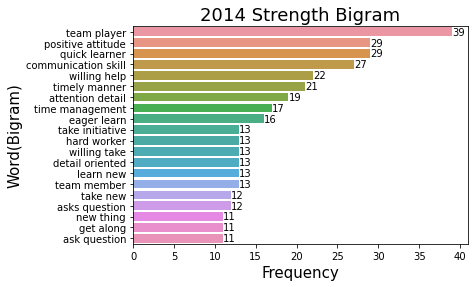

In [65]:
# Visualized the bigram
Vsns_14SBi_f = sns.barplot(x = 'frequency', y = 'word', data = df_14SBi_f.head(20))
for i in Vsns_14SBi_f.containers:
    Vsns_14SBi_f.bar_label(i,)
Vsns_14SBi_f.set_title('2014 Strength Bigram', size = 18)
Vsns_14SBi_f.set_xlabel("Frequency", size = 15)
Vsns_14SBi_f.set_ylabel("Word(Bigram)", size = 15)
# Reference:
# [1] https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
# [2] https://www.geeksforgeeks.org/change-axis-labels-set-title-and-figure-size-to-plots-with-seaborn/

In [66]:
S_Trilist = get_grams(S_Unilist, 3)
print(S_Trilist)

['ability manage time', 'manage time complete', 'time complete daily', 'complete daily assignment', 'daily assignment detail', 'assignment detail oriented', 'detail oriented extremely', 'oriented extremely organized', 'extremely organized communication', 'organized communication skill', 'communication skill reliable', 'skill reliable individualdemonstrates', 'reliable individualdemonstrates knowledge', 'individualdemonstrates knowledge compiling', 'knowledge compiling analyzing', 'compiling analyzing comparative', 'analyzing comparative report', 'comparative report data', 'report data skill', 'data skill creating', 'skill creating chart', 'creating chart graph', 'chart graph superior', 'graph superior knowledge', 'superior knowledge using', 'knowledge using microsoft', 'using microsoft office', 'microsoft office applicationdetailoriented', 'office applicationdetailoriented customerfocused', 'applicationdetailoriented customerfocused team', 'customerfocused team environmentattention', '

In [67]:
bow_14Strength_Tri = Counter(S_Trilist)

In [68]:
df_14STri_f = pd.DataFrame(bow_14Strength_Tri.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
df_14STri_f

,word,frequency
1922,willing learn new,5
2869,afraid ask question,5
687,team player willing,5
1212,problem solving skill,5
791,learn new thing,4
...,...,...
4001,skillcommitted goal time,1
4002,goal time managementextremely,1
4003,time managementextremely dependable,1
4004,managementextremely dependable reliable,1


Text(0.5, 1.0, '2014 Strength Trigram')

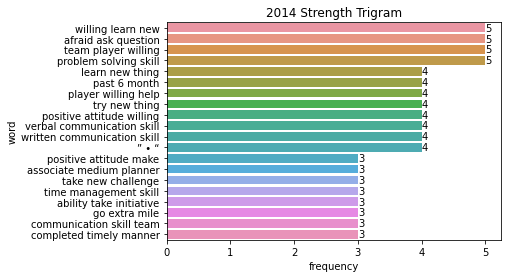

In [69]:
Vsns_14STri_f = sns.barplot(x = 'frequency', y = 'word', data = df_14STri_f.head(20))
for i in Vsns_14STri_f.containers:
    Vsns_14STri_f.bar_label(i,)
Vsns_14STri_f.set_title('2014 Strength Trigram')

In [70]:
df_15B = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/2015-B-EMPFreeResponse.csv")
df_15BE = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/2015-BE-EMPFreeResponse.csv")

In [71]:
df_15B.rename(columns = {"What are the student's strengths?":'Strengths'}, inplace = True)
df_15BE.rename(columns = {"What are the student's strengths?":'Strengths'}, inplace = True)

In [72]:
df_15contact = pd.concat([df_15B, df_15BE], axis = 0)

In [73]:
df_15contact.reset_index(inplace = True, drop = True)

In [74]:
df_15contact[['Strengths']] = df_15contact[['Strengths']].astype(str)
type(df_15contact['Strengths'])

pandas.core.series.Series

In [75]:
df_15contact['Strengths'] = df_15contact['Strengths'].apply(lambda x: remove_stopwords(x))

In [76]:
df_15contact['Strengths'] = df_15contact['Strengths'].apply(lambda x: remove_punctuations(x))

In [77]:
df_15contact['Strengths'] = df_15contact['Strengths'].str.lower()

In [78]:
df_15contact['Strengths_tokens'] = df_15contact['Strengths'].apply(lambda x: word_tokens(x))

In [79]:
df_15contact['Strengths_lem'] = df_15contact['Strengths_tokens'].apply(lambda x: Wnlemm(x))

In [80]:
df_15contact['Strengths_U'] = df_15contact['Strengths_lem'].apply(lambda x: remove_Uword(x))
df_15contact['Strengths_U']

0      dedication, understanding, material, could, ef...
1      rita, professional, involvement, entire, team,...
2      provieding, feedback, following, completing, a...
3      1, maturity, 2, self, starter, ability, comple...
4      chris, quickly, grasped, difficult, concept, p...
                             ...                        
694    problem, solver, ingenious, creative, idea, te...
695    mathematical, skill, ability, learn, quickly, ...
696    hard, worker, assigned, interest, intelligent,...
697    organized, self, starter, problem, solver, cre...
698                                                  nan
Name: Strengths_U, Length: 699, dtype: object

In [81]:
ag_15strength = "".join(df_15contact['Strengths_U'])
words_15strength = word_tokenize(ag_15strength)

In [82]:
for i in words_15strength[:]:
    if i == ",":
        words_15strength.remove(i)

In [83]:
bow_15Strength = Counter(words_15strength)
type(bow_15Strength)

collections.Counter

In [84]:
df_15S_f = pd.DataFrame(bow_15Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Unigram)')

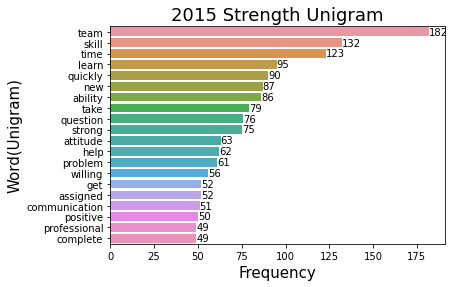

In [85]:
V15Sf_Uni = sns.barplot(x = 'frequency', y = 'word', data = df_15S_f.head(20))
for i in V15Sf_Uni.containers:
    V15Sf_Uni.bar_label(i,)
V15Sf_Uni.set_title('2015 Strength Unigram', size = 18)
V15Sf_Uni.set_xlabel("Frequency", size = 15)
V15Sf_Uni.set_ylabel("Word(Unigram)", size = 15)

In [86]:
List15S_Uni = ' '.join([str(item) for item in words_15strength])

In [87]:
List15S_Bi = get_grams(List15S_Uni, 2)
print(List15S_Bi)

['dedication understanding', 'understanding material', 'material could', 'could effictively', 'effictively execute', 'execute responsibilityrita', 'responsibilityrita professional', 'professional involvement', 'involvement entire', 'entire team', 'team open', 'open learn', 'learn new', 'new understood', 'understood asked', 'asked take', 'take given', 'given complete', 'complete minimal', 'minimal interaction', 'interaction teamprovieding', 'teamprovieding feedback', 'feedback following', 'following completing', 'completing assigned', 'assigned timely', 'timely manner1', 'manner1 maturity', 'maturity 2', '2 self', 'self starter', 'starter ability', 'ability complete', 'complete without', 'without much', 'much manager', 'manager oversightchris', 'oversightchris quickly', 'quickly grasped', 'grasped difficult', 'difficult concept', 'concept pertaining', 'pertaining pc', 'pc insurance', 'insurance general', 'general chubb', 'chubb ’', '’ structure', 'structure business', 'business process'

In [88]:
bow_15S_Bi = Counter(List15S_Bi)
df_15SBi_f = pd.DataFrame(bow_15S_Bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

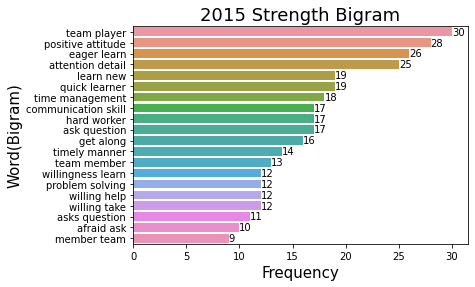

In [89]:
V15f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_15SBi_f.head(20))
for i in V15f_Bi.containers:
    V15f_Bi.bar_label(i,)
V15f_Bi.set_title('2015 Strength Bigram', size = 18)
V15f_Bi.set_xlabel("Frequency", size = 15)
V15f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [90]:
df_16B_1 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/201615-25-B-EMPFreeResponse.csv")
df_16B_2 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20163545-B-EMPFreeResponse.csv")
df_16BE_1 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/201615-25-BE-EMPFreeResponse.csv")
df_16BE_2 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20163545-BE-EMPFreeResponse.csv")

In [91]:
df_16BE = pd.concat([df_16BE_1, df_16BE_2], axis = 0)
df_16B = pd.concat([df_16B_1, df_16B_2], axis = 0)
df_16 = pd.concat([df_16B, df_16BE], axis = 0)

In [92]:
df_16.duplicated().sum()

0

In [93]:
df_16.isnull().sum()

Responder ID    0
Work Terms      0
College         0
Major           0
Conc            0
Class BOT       0
Citizenship     0
Co-op #         0
Strengths       1
dtype: int64

In [94]:
df_16[['Strengths']] = df_16[['Strengths']].astype(str)

In [95]:
df_16['Strengths'] = df_16['Strengths'].apply(lambda x: remove_stopwords(x))

In [96]:
df_16

,Responder ID,Work Terms,College,Major,Conc,Class BOT,Citizenship,Co-op #,Strengths
0,98,201615-201625,B,FIN,5COP,SR,US Citizen,Third,Michael enthusiastic responsibilities showed g...
1,105,201615-201625,B,ACCT,5COP,SR,US Citizen,Third,Andrew added lot value PCM co-op experience. H...
2,148,201615-201625,B,GBUS,5COP,JR,US Citizen,Third,Nick got along well co-ops friendly team.
3,159,201615-201625,B,FIN,5COP,SR,US Citizen,Third,"Dave incredibly hard worker, stays motivated p..."
4,181,201615-201625,B,MKTG,5COP,JR,US Citizen,Third,"Lauren fantastic ability take asked do, comple..."
...,...,...,...,...,...,...,...,...,...
30,5087,201635-201645,BE,ECON,5COP,PJ,Non US Citizen,First,articulate
31,5593,201645-201645,BE,ECON,5COP,PJ,Non US Citizen,First,"Resourceful, attentive, willing ask questions...."
32,5115,201635-201645,BE,ECON,5COP,PJ,Non US Citizen,First,"Kazuka bright, motivated, diligent pleasure wo..."
33,5126,201635-201645,BE,ECON,5COP,JR,Non US Citizen,First,Nausher detailed organized tasks completed.


In [97]:
df_16['Strengths'] = df_16['Strengths'].apply(lambda x: remove_punctuations(x))

In [98]:
df_16['Strengths'] = df_16['Strengths'].str.lower()

In [99]:
df_16['Strengths'] = df_16['Strengths'].apply(lambda x: word_tokens(x))

In [100]:
df_16

,Responder ID,Work Terms,College,Major,Conc,Class BOT,Citizenship,Co-op #,Strengths
0,98,201615-201625,B,FIN,5COP,SR,US Citizen,Third,"[michael, enthusiastic, responsibilities, show..."
1,105,201615-201625,B,ACCT,5COP,SR,US Citizen,Third,"[andrew, added, lot, value, pcm, coop, experie..."
2,148,201615-201625,B,GBUS,5COP,JR,US Citizen,Third,"[nick, got, along, well, coops, friendly, team]"
3,159,201615-201625,B,FIN,5COP,SR,US Citizen,Third,"[dave, incredibly, hard, worker, stays, motiva..."
4,181,201615-201625,B,MKTG,5COP,JR,US Citizen,Third,"[lauren, fantastic, ability, take, asked, do, ..."
...,...,...,...,...,...,...,...,...,...
30,5087,201635-201645,BE,ECON,5COP,PJ,Non US Citizen,First,[articulate]
31,5593,201645-201645,BE,ECON,5COP,PJ,Non US Citizen,First,"[resourceful, attentive, willing, ask, questio..."
32,5115,201635-201645,BE,ECON,5COP,PJ,Non US Citizen,First,"[kazuka, bright, motivated, diligent, pleasure..."
33,5126,201635-201645,BE,ECON,5COP,JR,Non US Citizen,First,"[nausher, detailed, organized, tasks, completed]"


In [101]:
df_16['Strengths'] = df_16['Strengths'].apply(lambda x: Wnlemm(x))

In [102]:
df_16['Strengths'] = df_16['Strengths'].apply(lambda x: remove_Uword(x))

In [103]:
ag_16strength = "".join(df_16['Strengths'])
words_16strength = word_tokenize(ag_16strength)

In [104]:
for i in words_16strength[:]:
    if i == ",":
        words_16strength.remove(i)

In [105]:
words_16strength

['michael',
 'enthusiastic',
 'responsibility',
 'showed',
 'initiative',
 'within',
 'teamandrew',
 'added',
 'lot',
 'value',
 'pcm',
 'experience',
 'quick',
 'learner',
 'ownership',
 'researched',
 'expanded',
 'pcms',
 'capability',
 'firm',
 'andrew',
 'passion',
 'investment',
 'bring',
 'new',
 'idea',
 'investment',
 'management',
 'teamnick',
 'got',
 'along',
 'friendly',
 'teamdave',
 'incredibly',
 'hard',
 'worker',
 'stay',
 'motivated',
 'positive',
 'assigned',
 'brings',
 'attitude',
 'every',
 'problem',
 'face',
 'dave',
 'demonstrated',
 'strong',
 'organizational',
 'processdriven',
 'skill',
 'this',
 'incredibly',
 'difficult',
 'job',
 'steel',
 'trap',
 '12',
 'different',
 'people',
 'asking',
 'weekly',
 'basis',
 'dave',
 'kept',
 'head',
 'water',
 'completed',
 'short',
 'longerterm',
 'this',
 'take',
 'strong',
 'developed',
 'timemanagement',
 'skill',
 'dave',
 'showed',
 'professional',
 'communication',
 'skill',
 'ceo',
 'spoke',
 'phone',
 'withl

In [106]:
bow_16Strength = Counter(words_16strength)
df_16S_f = pd.DataFrame(bow_16Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Unigram)')

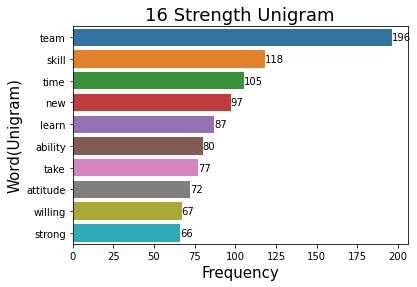

In [107]:
V16f_Uni = sns.barplot(x = 'frequency', y = 'word', data = df_16S_f.head(10))
for i in V16f_Uni.containers:
    V16f_Uni.bar_label(i,)
V16f_Uni.set_title('16 Strength Unigram', size = 18)
V16f_Uni.set_xlabel("Frequency", size = 15)
V16f_Uni.set_ylabel("Word(Unigram)", size = 15)

In [108]:
list16_Uni = ' '.join([str(item) for item in words_16strength])

In [109]:
list16_Bi = get_grams(list16_Uni, 2)
print(list16_Bi)

['michael enthusiastic', 'enthusiastic responsibility', 'responsibility showed', 'showed initiative', 'initiative within', 'within teamandrew', 'teamandrew added', 'added lot', 'lot value', 'value pcm', 'pcm experience', 'experience quick', 'quick learner', 'learner ownership', 'ownership researched', 'researched expanded', 'expanded pcms', 'pcms capability', 'capability firm', 'firm andrew', 'andrew passion', 'passion investment', 'investment bring', 'bring new', 'new idea', 'idea investment', 'investment management', 'management teamnick', 'teamnick got', 'got along', 'along friendly', 'friendly teamdave', 'teamdave incredibly', 'incredibly hard', 'hard worker', 'worker stay', 'stay motivated', 'motivated positive', 'positive assigned', 'assigned brings', 'brings attitude', 'attitude every', 'every problem', 'problem face', 'face dave', 'dave demonstrated', 'demonstrated strong', 'strong organizational', 'organizational processdriven', 'processdriven skill', 'skill this', 'this incre

In [110]:
bow_16Strength_Bi = Counter(list16_Bi)
df_16SBi_f = pd.DataFrame(bow_16Strength_Bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

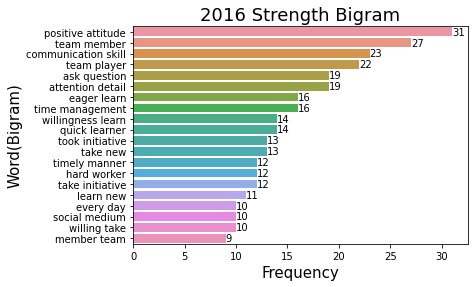

In [111]:
V16f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_16SBi_f.head(20))
for i in V16f_Bi.containers:
    V16f_Bi.bar_label(i,)
V16f_Bi.set_title('2016 Strength Bigram', size = 18)
V16f_Bi.set_xlabel("Frequency", size = 15)
V16f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [112]:
df_17B_1 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20171525-B-EMPFreeResponse.csv")
df_17B_2 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20173545-B- EFR Free Response.csv")
df_17BE_1 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20171525-BE-FW-EFR Free Response.csv")
df_17BE_2 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20173545-BE- EFR Free Response.csv")

In [113]:
df_17BE = pd.concat([df_17BE_1, df_17BE_2], axis = 0)
df_17B = pd.concat([df_17B_1, df_17B_2], axis = 0)
df_17 = pd.concat([df_17B, df_17BE], axis = 0)

In [114]:
df_17.reset_index(inplace = True, drop = True)
df_17B.reset_index(inplace = True, drop = True)
df_17BE.reset_index(inplace = True, drop = True)

In [115]:
df_17.duplicated().sum()
df_17B.duplicated().sum()
df_17BE.duplicated().sum()

0

In [116]:
df_17.isnull().sum()

Respondent ID    0
Work Terms       0
College          0
Major            0
Conc             0
Class BOT        0
Citizenship      0
Co-op #          0
Strengths        6
dtype: int64

In [117]:
df_17[['Strengths']] = df_17[['Strengths']].astype(str)

In [118]:
df_17['Strengths'] = df_17['Strengths'].apply(lambda x: remove_stopwords(x))

In [119]:
df_17['Strengths'] = df_17['Strengths'].apply(lambda x: remove_punctuations(x))

In [120]:
df_17['Strengths'] = df_17['Strengths'].str.lower()

In [121]:
df_17['Strengths'] = df_17['Strengths'].apply(lambda x: word_tokens(x))

In [122]:
df_17['Strengths'] = df_17['Strengths'].apply(lambda x: remove_Uword(x))

In [123]:
ag_17strength = "".join(df_17['Strengths'])
words_17strength = word_tokenize(ag_17strength)

In [124]:
for i in words_17strength[:]:
    if i == ",":
        words_17strength.remove(i)

In [125]:
bow_17Strength = Counter(words_17strength)

In [126]:
df_17S_f = pd.DataFrame(bow_17Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Unigram)')

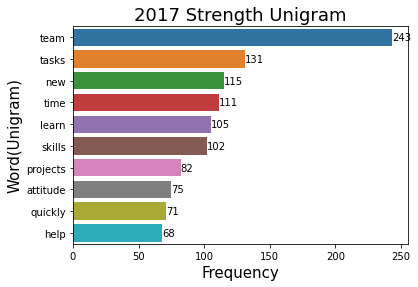

In [127]:
V17f_Uni = sns.barplot(x = 'frequency', y = 'word', data = df_17S_f.head(10))
for i in V17f_Uni.containers:
    V17f_Uni.bar_label(i,)
V17f_Uni.set_title('2017 Strength Unigram', size = 18)
V17f_Uni.set_xlabel("Frequency", size = 15)
V17f_Uni.set_ylabel("Word(Unigram)", size = 15)

In [128]:
list_17Uni = ' '.join([str(item) for item in words_17strength])

In [129]:
list_17Bi = get_grams(list_17Uni, 2)
list_17Bi

['over course',
 'course sachins',
 'sachins demonstrated',
 'demonstrated improvement',
 'improvement certain',
 'certain rigid',
 'rigid tasks',
 'tasks when',
 'when structured',
 'structured projects',
 'projects performed',
 'performed positive',
 'positive outlook',
 'outlook frequently',
 'frequently solicited',
 'solicited feedback',
 'feedback could',
 'could toward',
 'toward improving',
 'improving pleasant',
 'pleasant with',
 'with clear',
 'clear overwhelmed',
 'overwhelmed job',
 'job made',
 'made effort',
 'effort improve',
 'improve communicate',
 'communicate challenges',
 'challenges rest',
 'rest teamsteve',
 'teamsteve dependable',
 'dependable coworkers',
 'coworkers steve',
 'steve focus',
 'focus taskproject',
 'taskproject hand',
 'hand effectivelytaniya',
 'effectivelytaniya asset',
 'asset team',
 'team diligent',
 'diligent show',
 'show high',
 'high levels',
 'levels professionalism',
 'professionalism throughout',
 'throughout time',
 'time rolemature',


In [130]:
bow_17Strength_Bi = Counter(list_17Bi)
df_17SBi_f = pd.DataFrame(bow_17Strength_Bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

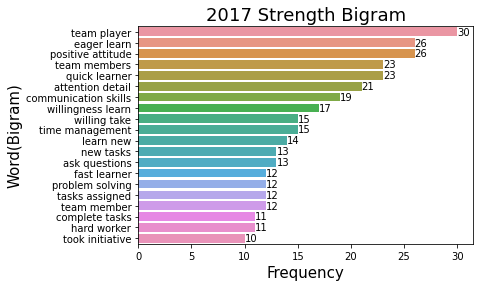

In [132]:
V17f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_17SBi_f.head(20))
for i in V17f_Bi.containers:
    V17f_Bi.bar_label(i,)
V17f_Bi.set_title('2017 Strength Bigram', size = 18)
V17f_Bi.set_xlabel("Frequency", size = 15)
V17f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [133]:
df_18B = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20181525-B-FW-EMPFreeResponse.csv")
df_18BE = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/20181525-BE-FW-EMPFreeResponse.csv")

In [134]:
df_18 = pd.concat([df_18B, df_18BE], axis = 0)

In [135]:
df_18.reset_index(inplace = True, drop = True)

In [136]:
df_18.duplicated().sum()

0

In [137]:
df_18.isnull().sum()

Respondent ID    0
Work Terms       0
College          0
Major            0
Conc             0
Class BOT        0
Citizenship      0
Co-op #          0
Strengths        2
dtype: int64

In [138]:
df_18[['Strengths']] = df_18[['Strengths']].astype(str)

In [139]:
df_18['Strengths'] = df_18['Strengths'].apply(lambda x: remove_stopwords(x))

In [140]:
df_18['Strengths'] = df_18['Strengths'].apply(lambda x: remove_punctuations(x))

In [141]:
df_18['Strengths'] = df_18['Strengths'].str.lower()

In [142]:
df_18['Strengths'] = df_18['Strengths'].apply(lambda x: word_tokens(x))

In [143]:
df_18['Strengths'] = df_18['Strengths'].apply(lambda x: Wnlemm(x))

In [144]:
df_18['Strengths'] = df_18['Strengths'].apply(lambda x: remove_Uword(x))

In [145]:
ag_18strength = "".join(df_18['Strengths'])
words_18strength = word_tokenize(ag_18strength)

In [146]:
for i in words_18strength[:]:
    if i == ",":
        words_18strength.remove(i)

In [147]:
list_18Uni = ' '.join([str(item) for item in words_18strength])

In [148]:
list_18Bi = get_grams(list_18Uni, 2)

In [149]:
bow_18Strength_Bi = Counter(list_18Bi)

In [150]:
df_18SBi_f = pd.DataFrame(bow_18Strength_Bi.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

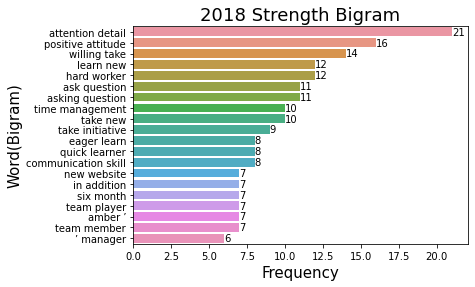

In [151]:
V18f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_18SBi_f.head(20))
for i in V18f_Bi.containers:
    V18f_Bi.bar_label(i,)
V18f_Bi.set_title('2018 Strength Bigram', size = 18)
V18f_Bi.set_xlabel("Frequency", size = 15)
V18f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [152]:
df_19= pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/AY 2019-BBE-EMPFreeResponse.csv")

In [153]:
df_19.duplicated().sum()

0

In [154]:
df_19.isnull().sum()

Respondent ID    0
Work Terms       0
College          0
Major            0
Conc             0
Class BOT        0
Citizenship      0
Co-op #          0
Strengths        2
dtype: int64

In [155]:
df_19[['Strengths']] = df_19[['Strengths']].astype(str)

In [156]:
df_19['Strengths'] = df_19['Strengths'].apply(lambda x: remove_stopwords(x))

In [157]:
df_19['Strengths'] = df_19['Strengths'].apply(lambda x: remove_punctuations(x))

In [158]:
df_19['Strengths'] = df_19['Strengths'].str.lower()

In [159]:
df_19['Strengths'] = df_19['Strengths'].apply(lambda x: word_tokens(x))

In [160]:
df_19['Strengths'] = df_19['Strengths'].apply(lambda x: Wnlemm(x))

In [161]:
df_19['Strengths'] = df_19['Strengths'].apply(lambda x: remove_Uword(x))

In [162]:
ag_19strength = "".join(df_19['Strengths'])
words_19strength = word_tokenize(ag_19strength)

In [163]:
for i in words_19strength[:]:
    if i == ",":
        words_19strength.remove(i)

In [164]:
list_19Uni = ' '.join([str(item) for item in words_19strength])

In [165]:
list_19Bi = get_grams(list_19Uni, 2)

In [166]:
bow_19Strength = Counter(list_19Bi)

In [167]:
df_19S_f = pd.DataFrame(bow_19Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

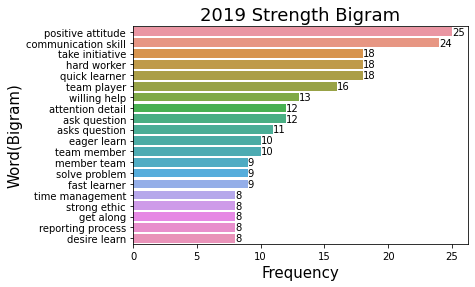

In [168]:
V19f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_19S_f.head(20))
for i in V19f_Bi.containers:
    V19f_Bi.bar_label(i,)
V19f_Bi.set_title('2019 Strength Bigram', size = 18)
V19f_Bi.set_xlabel("Frequency", size = 15)
V19f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [169]:
df_20 = pd.read_csv("D:/Master Courses/22 Fall Quarter/MIS 612/Group Project Final/Usable Data/AY 2020-BBE-EMP Free Response.csv")

In [170]:
df_20.duplicated().sum()

0

In [171]:
df_20.isnull().sum()

Respondent ID    0
Work Terms       0
College          0
Major            0
Conc             0
Class BOT        0
Citizenship      0
Co-op #          0
Strengths        1
dtype: int64

In [172]:
df_20[['Strengths']] = df_20[['Strengths']].astype(str)

In [173]:
df_20['Strengths'] = df_20['Strengths'].apply(lambda x: remove_stopwords(x))

In [174]:
df_20['Strengths'] = df_20['Strengths'].apply(lambda x: remove_punctuations(x))

In [175]:
df_20['Strengths'] = df_20['Strengths'].str.lower()

In [176]:
df_20['Strengths'] = df_20['Strengths'].apply(lambda x: word_tokens(x))

In [177]:
df_20['Strengths'] = df_20['Strengths'].apply(lambda x: Wnlemm(x))

In [178]:
df_20['Strengths'] = df_20['Strengths'].apply(lambda x: remove_Uword(x))
df_20

,Respondent ID,Work Terms,College,Major,Conc,Class BOT,Citizenship,Co-op #,Strengths
0,2181,Spring/Summer,B,ACCT,5COP,SR,Domestic,Third/Final,"asks, question, positive, attitude"
1,74,Fall/Winter,B,MIS,5COP,SR,Domestic,Third/Final,"number, based, analytics, advanced, excel"
2,5586,Spring/Summer,B,FIN,5COP,SR,Domestic,Second,"christina, organized, focused, accepts, feedba..."
3,2366,Spring/Summer,B,FIN,5COP,SR,Domestic,Third/Final,"justin, pick, process, quickly, efficiently, c..."
4,2367,Spring/Summer,B,MKTG,5COP,SR,Domestic,Third/Final,"alessandra, wonderful, attitude, highly, profe..."
...,...,...,...,...,...,...,...,...,...
701,5558,Spring/Summer,B,FIN,4COP,SR,Domestic,First,"successfully, take, new, solve, problem"
702,5562,Spring/Summer,B,MKTG,5COP,JR,International,First,"nhi, effective, analyzing, data, using, variet..."
703,5912,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,"willie, polite, willing, listen, follows, dire..."
704,5572,Spring/Summer,B,ACCT,5COP,JR,International,First,"munira, fantastic, asset, finance, team, detai..."


In [179]:
ag_20strength = "".join(df_20['Strengths'])
words_20strength = word_tokenize(ag_20strength)

In [180]:
for i in words_20strength[:]:
    if i == ",":
        words_20strength.remove(i)

In [181]:
list_20Uni = ' '.join([str(item) for item in words_20strength])

In [182]:
list_20Bi = get_grams(list_20Uni, 2)

In [183]:
bow_20Strength = Counter(list_20Bi)

In [184]:
df_20S_f = pd.DataFrame(bow_20Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

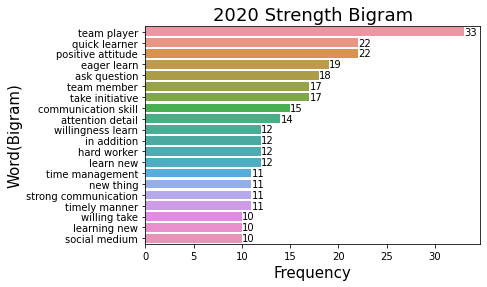

In [185]:
V20f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_20S_f.head(20))
for i in V20f_Bi.containers:
    V20f_Bi.bar_label(i,)
V20f_Bi.set_title('2020 Strength Bigram', size = 18)
V20f_Bi.set_xlabel("Frequency", size = 15)
V20f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [186]:
df_14SBi_f.head(20)

,word,frequency
214,team player,39
681,positive attitude,29
35,quick learner,29
10,communication skill,27
245,willing help,22
1564,timely manner,21
1292,attention detail,19
1895,time management,17
221,eager learn,16
2125,take initiative,13


In [187]:
df_14SBi_f['word']

214              team player
681        positive attitude
35             quick learner
10       communication skill
245             willing help
                ...         
3757         process learned
3758            learned deal
3759            deal complex
3760      complex challening
10541          learn listens
Name: word, Length: 10542, dtype: object

In [188]:
print(df_14SBi_f.iloc[:21,0])

214             team player
681       positive attitude
35            quick learner
10      communication skill
245            willing help
1564          timely manner
1292       attention detail
1895        time management
221             eager learn
2125        take initiative
134             hard worker
385            willing take
6           detail oriented
45                learn new
242             team member
145                take new
78            asks question
774               new thing
5231              get along
2285           ask question
516        attitude willing
Name: word, dtype: object


In [189]:
print(df_15SBi_f.iloc[:21,0])

105             team player
130       positive attitude
219             eager learn
513        attention detail
12                learn new
308           quick learner
1467        time management
471     communication skill
892             hard worker
454            ask question
1794              get along
1180          timely manner
122             team member
808       willingness learn
1437        problem solving
666            willing help
2194           willing take
676           asks question
216              afraid ask
59              member team
1967        ability quickly
Name: word, dtype: object


In [190]:
df_14_20 = pd.concat([df_preproce['Strengths_U'], df_15contact['Strengths_U'], df_16['Strengths'], df_17['Strengths'], df_18['Strengths'], df_19['Strengths'], df_20['Strengths']], axis = 0)

In [191]:
df_14_20

0      ability, manage, time, complete, daily, assign...
1      demonstrates, knowledge, compiling, analyzing,...
2      detailoriented, customerfocused, team, environ...
3      attention, detail, ethic, quick, learner, show...
4        communication, skill, leadership, lead, example
                             ...                        
701              successfully, take, new, solve, problem
702    nhi, effective, analyzing, data, using, variet...
703    willie, polite, willing, listen, follows, dire...
704    munira, fantastic, asset, finance, team, detai...
705    a, ppl, person, quick, learner, adaptive, new,...
Length: 4374, dtype: object

In [192]:
ag_14_20strength = "".join(df_14_20)
words_14_20strength = word_tokenize(ag_14_20strength)

In [193]:
for i in words_14_20strength[:]:
    if i == ",":
        words_14_20strength.remove(i)

In [194]:
list_14_20Uni = ' '.join([str(item) for item in words_14_20strength])

In [195]:
list_14_20Bi = get_grams(list_14_20Uni, 2)

In [196]:
bow_14_20Strength = Counter(list_14_20Bi)

In [197]:
df_1420S_f = pd.DataFrame(bow_14_20Strength.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

Text(0, 0.5, 'Word(Bigram)')

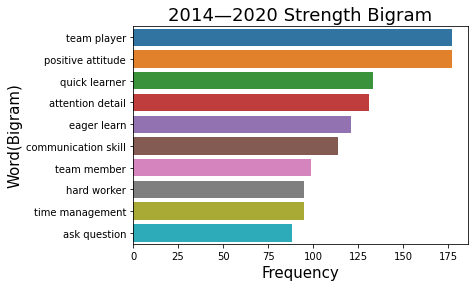

In [206]:
V1420f_Bi = sns.barplot(x = 'frequency', y = 'word', data = df_1420S_f.head(10))
V1420f_Bi.set_title('2014—2020 Strength Bigram', size = 18)
V1420f_Bi.set_xlabel("Frequency", size = 15)
V1420f_Bi.set_ylabel("Word(Bigram)", size = 15)

In [207]:
df_1420S_f

,word,frequency
0,team player,177
1,positive attitude,177
2,quick learner,133
3,attention detail,131
4,eager learn,121
...,...,...
60262,detail proven,1
60263,became high,1
60264,high functioning,1
60265,functioning member,1


In [200]:
df_20S_f.head(20)

,word,frequency
67,team player,33
109,quick learner,22
1104,positive attitude,22
961,eager learn,19
614,ask question,18
1064,team member,17
205,take initiative,17
38,communication skill,15
971,attention detail,14
545,willingness learn,12


In [201]:
df_1420S_f.reset_index(inplace = True, drop = True)
df_1420S_f

,word,frequency
0,team player,177
1,positive attitude,177
2,quick learner,133
3,attention detail,131
4,eager learn,121
...,...,...
60262,detail proven,1
60263,became high,1
60264,high functioning,1
60265,functioning member,1


In [202]:
df_17SBi_f

,word,frequency
58,team player,30
196,eager learn,26
313,positive attitude,26
1785,team members,23
242,quick learner,23
...,...,...
3938,hand when,1
3940,assigned would,1
3941,would put,1
3942,put head,1


In [203]:
df_18SBi_f

,word,frequency
40,attention detail,21
73,positive attitude,16
1444,willing take,14
1786,learn new,12
324,hard worker,12
...,...,...
2257,stepped team,1
2256,transition stepped,1
2255,time transition,1
2254,worked time,1


In [204]:
df_19S_f

,word,frequency
264,positive attitude,25
9,communication skill,24
351,take initiative,18
93,hard worker,18
118,quick learner,18
...,...,...
3466,ability many,1
3467,many differentjohn,1
3468,differentjohn willing,1
3469,willing hardworkermalaika,1


In [205]:
df_20S_f

,word,frequency
67,team player,33
109,quick learner,22
1104,positive attitude,22
961,eager learn,19
614,ask question,18
...,...,...
3905,writing ability,1
3906,ability analysis,1
3907,analysis difficult,1
3908,difficult situationproactive,1


In [ ]:
## Acknowledgments: 
# Codes are completed by Ruifeng Wang, since I am new to Python programming, I refer to Yamini(Group leader), CSDN, Jianshu, geeksforgeeks, stackoverflow. Reference links are posted as comments when I refered for the first time, thank you for their help.